# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_complete_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [153]:
# Checking the number of mice.
number_of_mice = mouse_complete_df["Mouse ID"].nunique()
number_of_mice


249

In [154]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_complete_df[mouse_complete_df[["Mouse ID", "Timepoint"]].duplicated()==True]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [155]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_val = mouse_complete_df.loc[mouse_complete_df.duplicated(
    subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_val

array(['g989'], dtype=object)

In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_complete_df = mouse_complete_df[mouse_complete_df['Mouse ID'].isin(duplicate_val)==False]
                                            
new_mouse_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [157]:
# Checking the number of mice in the clean DataFrame.
new_mouse_complete_df["Mouse ID"].nunique()

248

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation,and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. Assemble the resulting series into a single summary DataFrame.

drug_regimen = new_mouse_complete_df.set_index(["Drug Regimen"])
drug_data_df = drug_regimen.groupby("Drug Regimen")
rd_num = 3

tumor_mean = round(drug_data_df["Tumor Volume (mm3)"].mean(),rd_num)
tumor_median = round(drug_data_df["Tumor Volume (mm3)"].median(),rd_num)
tumor_var = round(drug_data_df["Tumor Volume (mm3)"].var(),rd_num)
tumor_std = round(drug_data_df["Tumor Volume (mm3)"].std(),rd_num)
tumor_sem = round(drug_data_df["Tumor Volume (mm3)"].sem(),rd_num)

regimen_results = pd.DataFrame({"Mean Tumor Vol.": tumor_mean,
                                "Median Tumor Vol.": tumor_median,
                                "Tumor Variance": tumor_var,
                                "Tumor Std. Dev.": tumor_std,
                                "SEM": tumor_sem})
regimen_results

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Variance,Tumor Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [159]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

aggregate_regimen = round(drug_regimen.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":
                                                              ['mean', 'median','var', 'std', 'sem']}),rd_num)

aggregate_regimen

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.321  50.446  43.852  6.622  0.544
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

<Axes: xlabel='Regimen', ylabel='# of Observed Mouse Timepoints'>

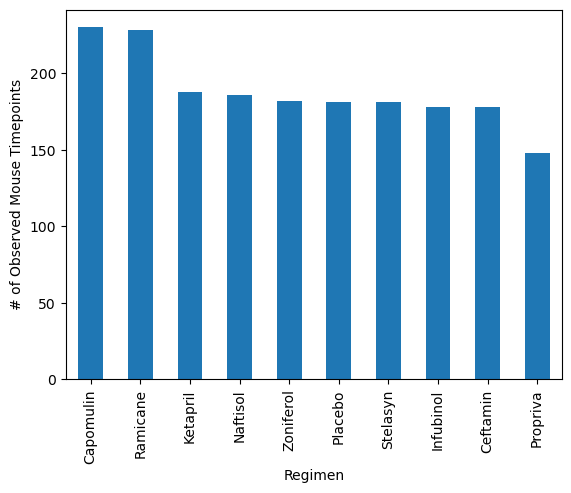

In [160]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_timepoint_df = new_mouse_complete_df[["Drug Regimen", "Timepoint"]]
drug_count = drug_timepoint_df["Drug Regimen"].value_counts()

drug_count.plot(kind="bar", xlabel="Regimen", ylabel="# of Observed Mouse Timepoints")
# plt.xlabel("Regimen")
# plt.ylabel("# of Observed Mouse Timepoints")

Text(0, 0.5, '# of Observed Mouse Timepoints')

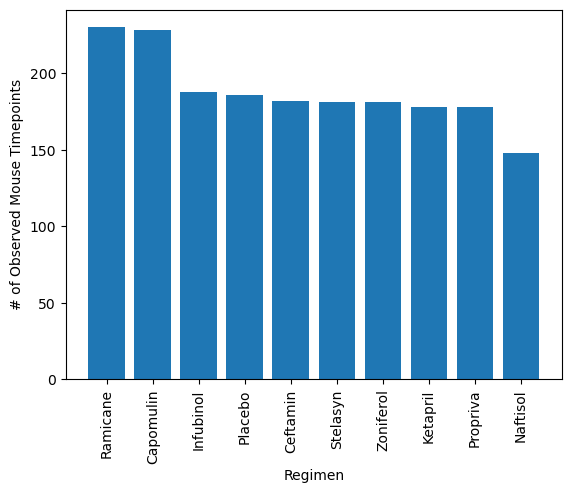

In [161]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = new_mouse_complete_df['Drug Regimen'].unique()
y_axis = new_mouse_complete_df['Drug Regimen'].value_counts()

plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.xlabel("Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


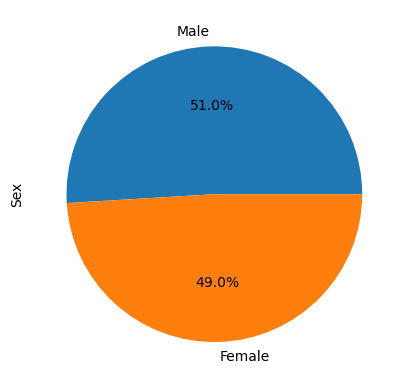

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_df = new_mouse_complete_df[["Mouse ID", "Sex"]]
male_female_count = male_female_df["Sex"].value_counts()

pie = male_female_count.plot(kind="pie", autopct='%1.1f%%',startangle=0, ylabel = "Sex")
# pie.set_ylabel("Sex")
# plt.title("Distribution of female vs male mice")

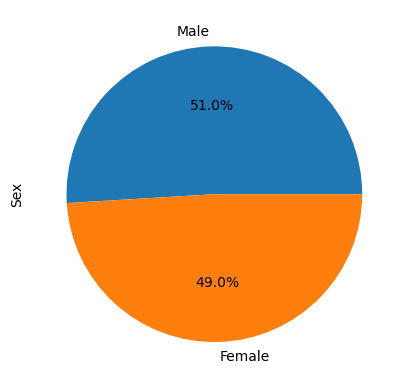

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_labels = new_mouse_complete_df["Sex"].unique()
mf_count = male_female_count

plt.pie(mf_count, labels=mf_labels, autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = new_mouse_complete_df.groupby(['Mouse ID'])['Timepoint'].max()
# last_timepoint_df
tumor_df = last_timepoint_df.reset_index()
tumor_df

# reduced_tumor_df = new_mouse_complete_df.loc[new_mouse_complete_df['Drug Regimen']
#                                              .isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# final_tumor_vol_df = new_mouse_complete_df.loc[
#     new_mouse_complete_df['Timepoint'] == 45, 
#     ['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]

# final_tumor_vol_df = final_tumor_vol_df.loc[
#     final_tumor_vol_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
 

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [165]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_tumor_df = pd.merge(tumor_df, new_mouse_complete_df, 
                                   how="left", on = ["Mouse ID", 'Timepoint'])
# Display the data table for preview
last_timepoint_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [224]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']       

# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes (COMPLETE)
# add subset
tumor_vol_list = []

for drug in treatment_list:
    new_df = last_timepoint_tumor_df.loc[last_timepoint_tumor_df['Drug Regimen']==drug,
                                         'Tumor Volume (mm3)']  
    tumor_vol_list.append(new_df)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    quartiles = new_df.quantile([.25,.5,.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q-lower_q
 # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)

# Give the outliers 

# print(f'Capomulin's potential outliers: Series([tumor_vol_list] 
#                                                Name: Tumor Volume (mm3) dtype: float64')
# Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
# Infubinol's potential outliers: 31    36.321346
# Name: Tumor Volume (mm3), dtype: float64
# Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

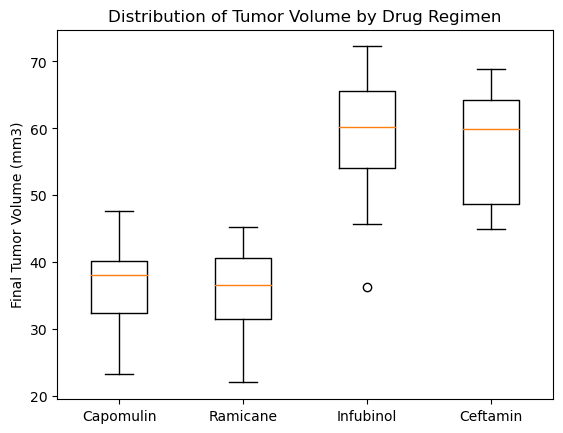

In [237]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_list, labels = treatment_list)
plt.title('Distribution of Tumor Volume by Drug Regimen') #generic title for now
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
